## Life Expectancy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/Life Expectancy Data.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns = [x.strip() for x in df.columns]

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df_short = df[["Country", "Year","Life expectancy","GDP", "Alcohol", "Schooling", "Population", "Polio"]].copy()

In [10]:
df_short.head()

,Country,Year,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
0,Afghanistan,2015,65.0,584.259210,0.01,10.1,33736494.0,6.0
1,Afghanistan,2014,59.9,612.696514,0.01,10.0,327582.0,58.0
2,Afghanistan,2013,59.9,631.744976,0.01,9.9,31731688.0,62.0
3,Afghanistan,2012,59.5,669.959000,0.01,9.8,3696958.0,67.0
4,Afghanistan,2011,59.2,63.537231,0.01,9.5,2978599.0,68.0


In [45]:
def plot_hist(data, xlabel, ax):
    
    ax.hist(data, label=xlabel)
    ax.set_xlabel(xlabel)
    ax.legend()
    
def plot_scatter(x,y,xlabel,ylabel,ax):
    ax.scatter(x, y)

    ax.set_ylabel(xlabel)
    ax.set_xlabel(ylabel)


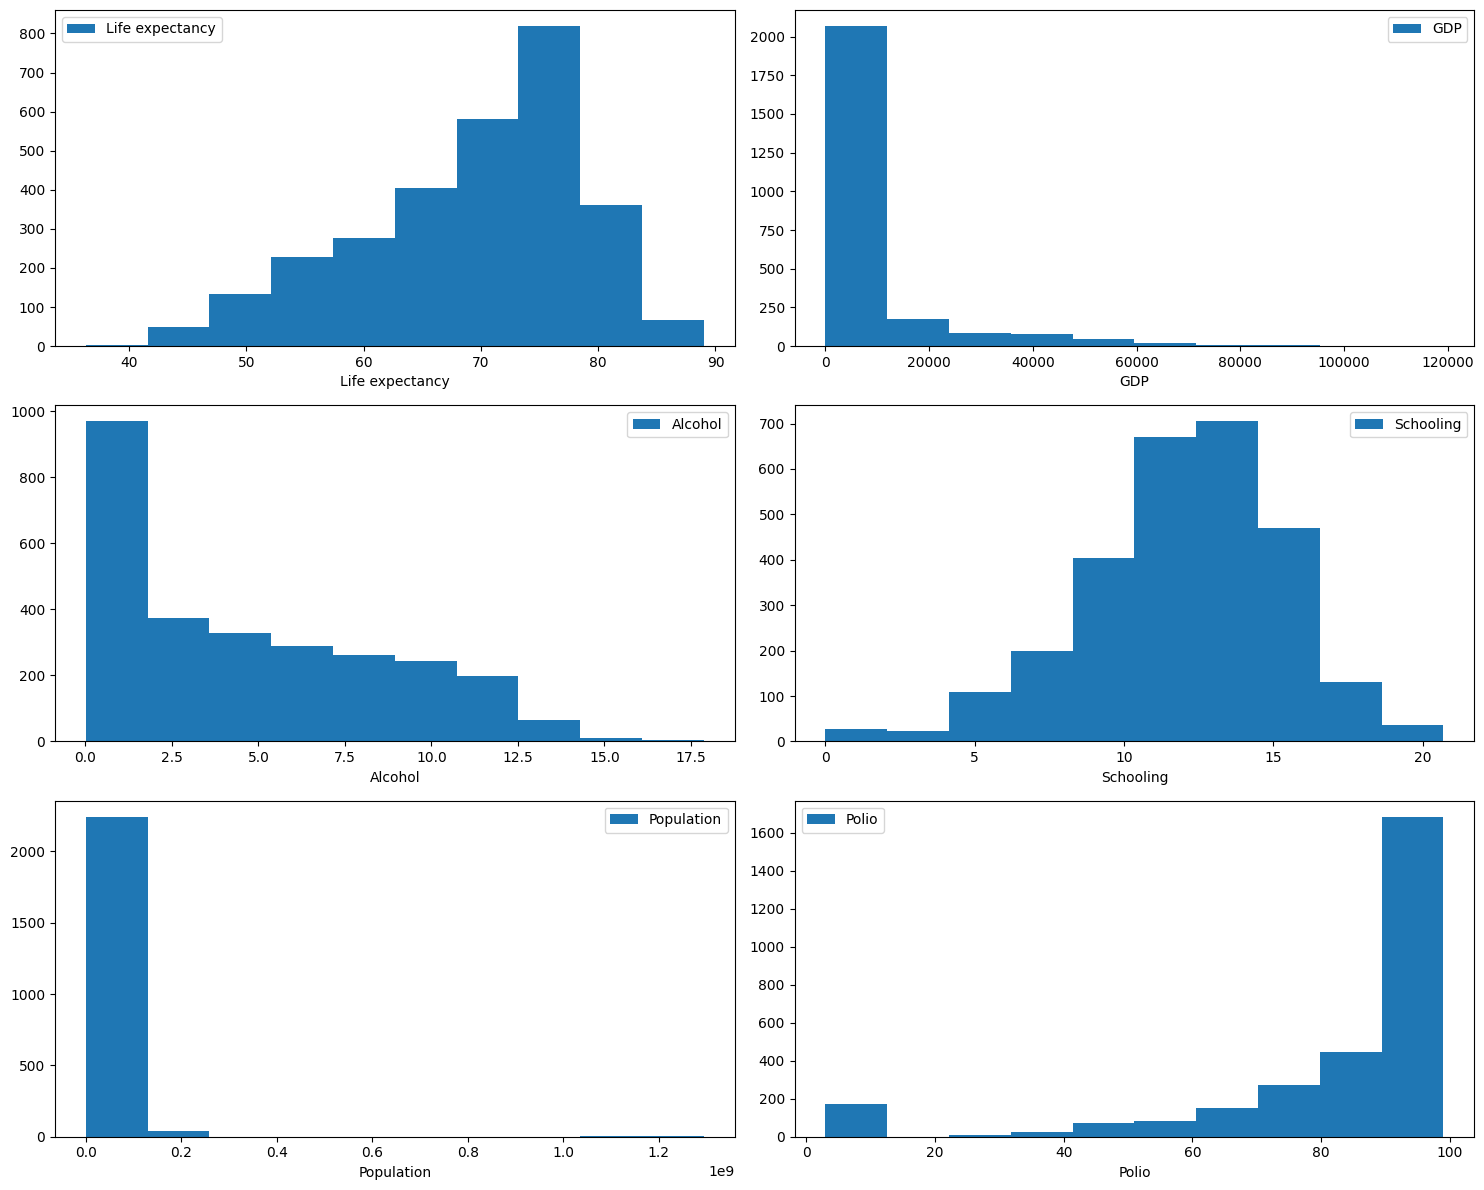

In [28]:
fig, axes = plt.subplots(figsize=(15, 12), nrows=3, ncols=2, tight_layout=True)

axes = axes.flatten()
columns = df_short.columns[2:]
for ax, col in zip(axes, columns):
    plot_hist(df_short[col], col, ax)
plt.show()

In [15]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [18]:
axess = axes.flatten()

In [29]:
df_short.describe()

,Year,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
count,2938.000000,2928.000000,2490.000000,2744.000000,2775.000000,2.286000e+03,2919.000000
mean,2007.518720,69.224932,7483.158469,4.602861,11.992793,1.275338e+07,82.550188
std,4.613841,9.523867,14270.169342,4.052413,3.358920,6.101210e+07,23.428046
min,2000.000000,36.300000,1.681350,0.010000,0.000000,3.400000e+01,3.000000
25%,2004.000000,63.100000,463.935626,0.877500,10.100000,1.957932e+05,78.000000
50%,2008.000000,72.100000,1766.947595,3.755000,12.300000,1.386542e+06,93.000000
75%,2012.000000,75.700000,5910.806335,7.702500,14.300000,7.420359e+06,97.000000
max,2015.000000,89.000000,119172.741800,17.870000,20.700000,1.293859e+09,99.000000


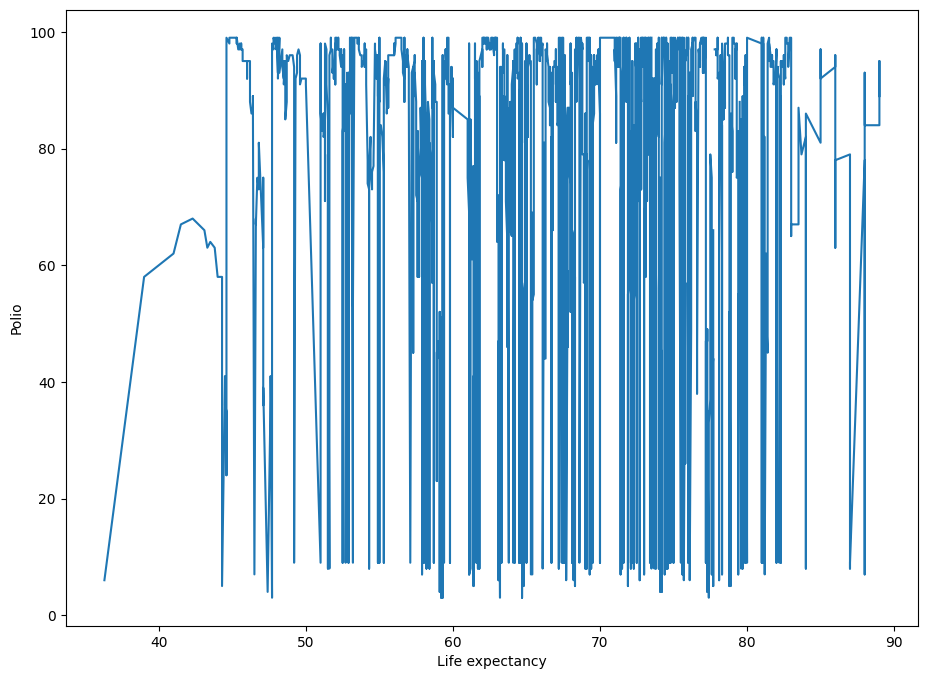

In [31]:
fig, axes = plt.subplots(figsize = (11,8))

df_short.sort_values("Life expectancy", inplace=True)
axes.plot(df_short['Life expectancy'], df.Polio)

axes.set_xlabel("Life expectancy")
axes.set_ylabel("Polio")

plt.show()

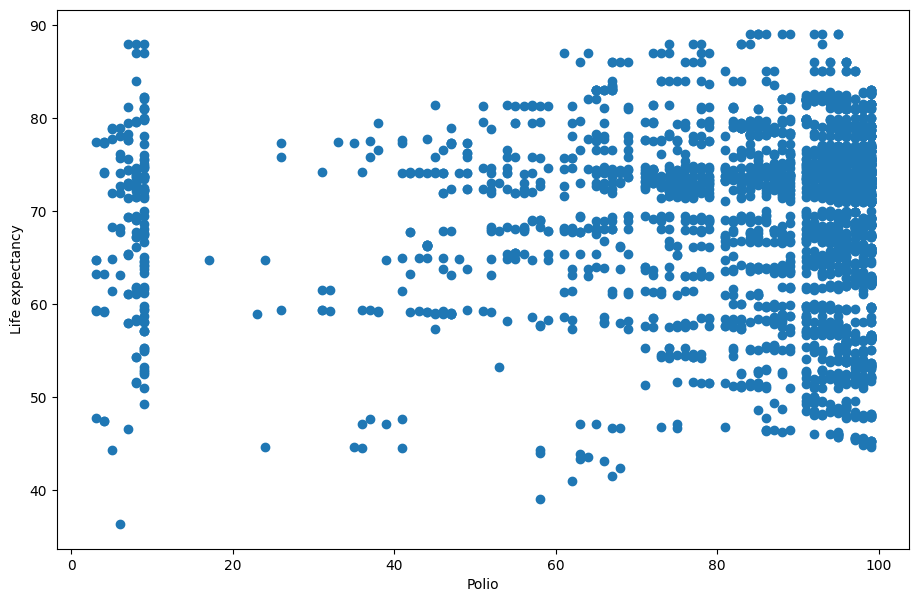

In [34]:
fig, axes = plt.subplots(figsize = (11,7))

df_short.sort_values("Life expectancy", inplace=True)
axes.scatter(df.Polio, df_short['Life expectancy'])

axes.set_ylabel("Life expectancy")
axes.set_xlabel("Polio")

plt.show()

In [35]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [36]:
df.Polio.describe()

count    2919.000000
mean       82.550188
std        23.428046
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64

In [44]:
df_short.head()

,Country,Year,Life expectancy,GDP,Alcohol,Schooling,Population,Polio
1127,Haiti,2010,36.3,662.279518,5.76,8.6,9999617.0,66.0
2312,Sierra Leone,2000,39.0,139.314773,3.97,6.7,4564297.0,46.0
2311,Sierra Leone,2001,41.0,227.779471,4.21,7.0,4739147.0,38.0
2309,Sierra Leone,2003,41.5,263.761831,4.07,7.4,5199549.0,66.0
2308,Sierra Leone,2004,42.3,263.145817,3.99,7.6,5439695.0,69.0


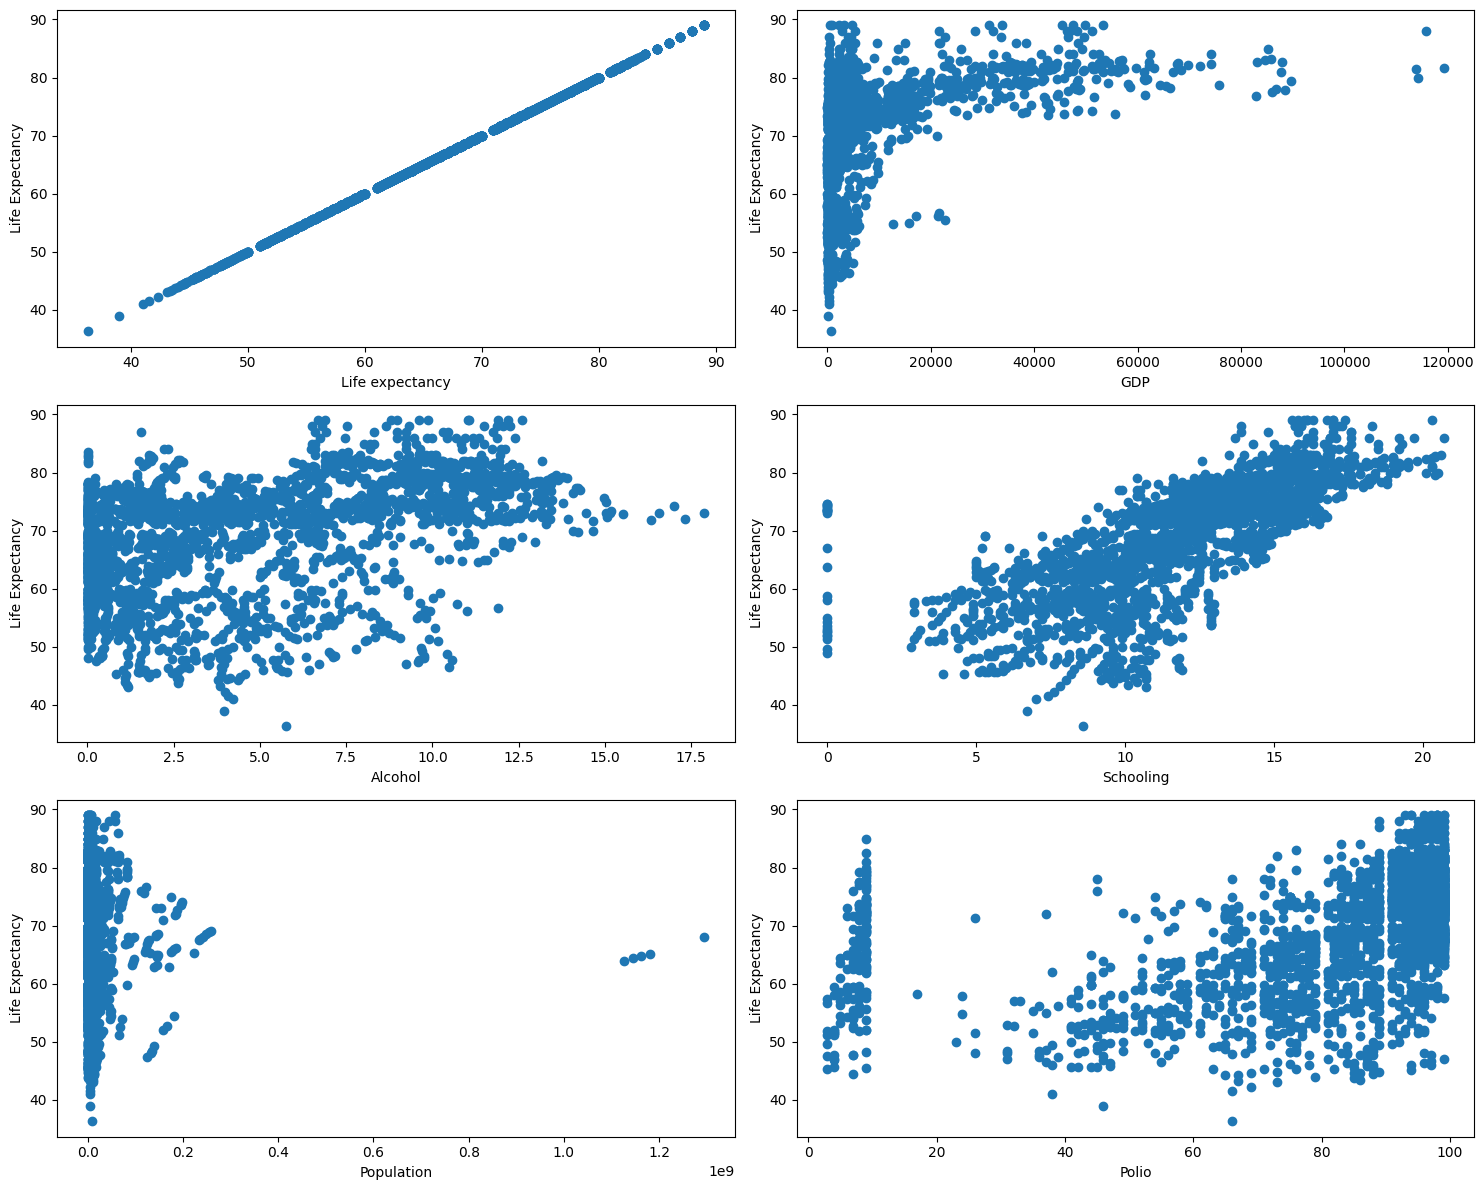

In [46]:
fig, axes = plt.subplots(figsize=(15, 12), nrows=3, ncols=2, tight_layout=True)

axes = axes.flatten()
columns = df_short.columns[2:]
for ax, col in zip(axes, columns):
    plot_scatter(df_short[col], df_short["Life expectancy"], "Life Expectancy", col, ax)
plt.show()